In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/MADE/RL_DL_HW/rl_dl_made_homeworks/HW2

/content/drive/MyDrive/MADE/RL_DL_HW/rl_dl_made_homeworks/HW2


In [3]:
import sys
sys.path.append("/content/drive/MyDrive/MADE/RL_DL_HW/rl_dl_made_homeworks/HW2")

# Imports

In [4]:
from collections import defaultdict
import numpy as np
import pandas as pd
from copy import deepcopy
import random
import pickle
import matplotlib.pyplot as plt

In [5]:
from env import TicTacToe
from helpers import get_and_print_move, plot_board

# Пункт 1 Q learning 3x3

In [ ]:
env = TicTacToe(3, 3, 3)

In [ ]:
env.reset()

In [ ]:
env.getState()

('111111111', array([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 2]]), 1)

In [6]:
def get_empty_actions(state):
    state_array = np.array(list(state))
    return np.where(state_array == '1')[0]

def get_blocked_actions(state):
    state_array = np.array(list(state))
    return np.where(state_array != '1')[0]

In [7]:
class Player:
    def __init__(self, lr, gamma, Q, epsilon) -> None:
        self.s = None
        self.a = None
        self.lr = lr
        self.gamma = gamma
        self.Q = Q
        self.epsilon = epsilon
        
    def update_Q(self, next_s, next_a, r) -> None:
        if self.a is not None and self.s is not None:
            self.Q[self.s][self.a] = self.Q[self.s][self.a] + self.lr * (
                r + self.gamma * np.max(self.Q[next_s]) - self.Q[self.s][self.a])
        self.s = next_s
        self.a = next_a
            
    def get_action(self, s) -> int:
        if np.random.random() < self.epsilon:
            return random.choice(get_empty_actions(s))
        self.Q[s][get_blocked_actions(s)] = float("-Inf")
        return np.argmax(self.Q[s])
    
    def get_greedy_action(self, s) -> int:
        self.Q[s][get_blocked_actions(s)] = float("-Inf")
        return np.argmax(self.Q[s])

In [8]:
class RandomPlayer:
    def __init__(self):
        ...
        
    def get_greedy_action(self, s) -> int:
        return random.choice(get_empty_actions(s))

In [9]:
class GameManager:
    
    def __init__(self, env):
        self.env = env
        lr = 0.03
        gamma = 0.6
        s, empty_spaces, turn =self.env.getState()
        self.Q = defaultdict(lambda: np.random.rand(len(empty_spaces)))
        self.players = [Player(lr, gamma, self.Q, 0.2), Player(lr, gamma, self.Q, 0.2)]
        random_player = RandomPlayer()
        self.eval_players = [[random_player, self.players[1]], [self.players[0], random_player]]
        
    def run_episode(self):
        self.env.reset()
        self.players[0].a = None
        self.players[1].a = None
        s, empty_spaces, turn =self.env.getState()
        done = False
        player_id = 0

        while not done:
            a = self.players[player_id].get_action(s)
            self.players[player_id].update_Q(s, a, 0)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        self.players[0].update_Q(s, a, r) 
        self.players[1].update_Q(s, a, -r)
        
    def evaluate_episode_with_random(self, random_player_id: int) -> float:
        self.env.reset()
        s, empty_spaces, turn =self.env.getState()
        done = False
        players_eval = self.eval_players[random_player_id]
        player_id = 0
        while not done:
            a = players_eval[player_id].get_greedy_action(s)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        return r

In [ ]:
game_manager = GameManager(env)

In [ ]:
eval_results_o = []
eval_results_x = []
for i in range(300):
    eval_x = []
    eval_o = []
    for _ in range(1000):
        game_manager.run_episode()
    for _ in range(100):
        eval_x.append(game_manager.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

0.22 -0.22
0.6 -0.18
0.64 -0.16
0.43 -0.11
0.36 -0.09
0.33 -0.16
0.39 -0.17
0.52 -0.07
0.2 -0.0
0.36 -0.22
0.36 -0.04
0.44 -0.19
0.64 0.02
0.61 -0.01
0.37 -0.09
0.38 0.04
0.4 0.03
0.46 -0.02
0.81 -0.0
0.58 0.17
0.48 0.09
0.69 0.13
0.69 0.39
0.56 0.31
0.81 0.35
0.74 0.29
0.7 0.31
0.71 0.35
0.64 0.3
0.73 0.33
0.74 0.11
0.74 0.3
0.88 0.24
0.85 0.37
0.82 0.33
0.85 0.23
0.83 0.23
0.88 0.47
0.9 0.32
0.93 0.28
0.83 0.31
0.95 0.49
0.86 0.39
0.96 0.54
0.91 0.6
0.94 0.36
0.88 0.65
0.98 0.62
0.95 0.49
0.99 0.65
0.91 0.64
0.85 0.69
0.91 0.66
0.96 0.78
0.94 0.65
0.82 0.58
0.91 0.63
0.92 0.68
0.91 0.78
1.0 0.81
0.92 0.81
0.94 0.74
1.0 0.82
0.99 0.72
0.89 0.7
0.95 0.69
0.96 0.76
0.99 0.71
0.91 0.75
0.91 0.7
0.82 0.76
0.97 0.74
1.0 0.83
0.94 0.78
1.0 0.73
0.98 0.79
0.99 0.78
0.99 0.6
0.97 0.77
0.87 0.8
0.99 0.79
1.0 0.9
1.0 0.88
0.99 0.79
0.99 0.92
0.98 0.77
0.99 0.92
0.94 0.77
0.91 0.9
1.0 0.81
0.99 0.83
0.99 0.85
1.0 0.89
1.0 0.89
0.99 0.82
0.98 0.9
1.0 0.88
0.99 0.92
0.91 0.88
0.88 0.82
0.99 0.85
0

In [ ]:
with open('../../q_dict.pkl', 'wb') as handle:
    pickle.dump(dict(game_manager.Q), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('../../q_dict.pkl', 'rb') as f:
    data_new = pickle.load(f)

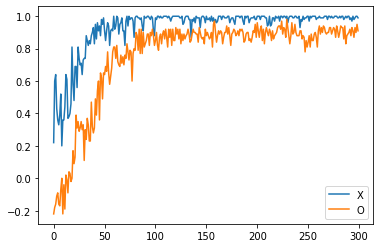

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

с Exporation epsilon - 0.1. обучились только Х, а О не смогли. Эту модель обучал при epsilon = 0.3

## Q learning 4x4

In [11]:
env4 = TicTacToe(4, 4, 4)

In [20]:
game_manager4 = GameManager(env4)

eval_results_o = []
eval_results_x = []
for i in range(2000):
    eval_x = []
    eval_o = []
    for _ in range(2000):
        game_manager4.run_episode()
    for _ in range(100):
        eval_x.append(game_manager4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

0.29 -0.04
0.08 -0.0
-0.07 -0.01
0.04 -0.0
0.06 -0.07
0.15 -0.23
-0.05 -0.15
-0.04 0.01
-0.06 -0.04
-0.08 -0.07
0.23 0.03
0.06 -0.05
0.05 -0.18
0.03 -0.01
0.06 -0.04
0.07 -0.04
0.13 0.08
0.05 0.07
0.27 0.1
0.05 -0.03
0.29 0.08
0.03 -0.1
0.06 0.14
0.02 -0.11
0.04 -0.08
-0.02 0.03
0.06 0.06
-0.02 -0.14
0.21 -0.07
0.03 -0.08
0.1 -0.01
0.2 -0.16
0.13 -0.05
0.13 0.01
0.07 -0.08
0.13 -0.07
0.11 -0.12
0.11 -0.14
-0.05 -0.08
0.1 -0.02
-0.05 -0.07
-0.08 0.09
-0.05 -0.06
0.13 0.02
0.01 -0.07
0.01 -0.06
-0.01 -0.14
0.06 0.02
-0.02 -0.05
0.05 -0.04
0.07 -0.0
0.12 -0.13
-0.06 -0.07
0.03 -0.07
0.04 -0.05
0.19 0.03
0.19 -0.04
0.14 -0.08
0.07 -0.11
0.2 -0.04
0.16 0.07
0.0 -0.14
-0.01 -0.03
0.15 0.03
0.05 -0.15
0.22 -0.0
0.15 0.11
0.1 -0.1
-0.03 -0.11
0.28 -0.0
0.02 0.13
0.12 -0.16
0.23 -0.09
0.19 0.02
0.09 0.04
0.14 -0.12
-0.01 0.04
-0.08 -0.06
0.08 -0.08
0.26 -0.04
0.17 -0.05
0.08 -0.15
-0.02 -0.21
0.2 -0.04
0.13 -0.04
0.21 -0.04
0.25 -0.05
0.13 0.02
0.07 -0.0
0.19 -0.12
-0.03 -0.08
-0.01 -0.06
0.01 

In [21]:
with open('../../q_dict4.pkl', 'wb') as handle:
    pickle.dump(dict(game_manager4.Q), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
with open('../../q_dict4.pkl', 'rb') as f:
    data_new = pickle.load(f)

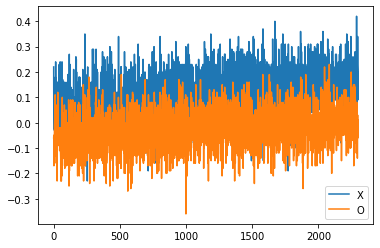

In [23]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

In [24]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

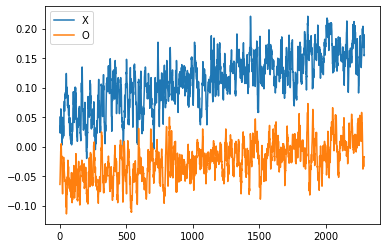

In [25]:
plt.plot(moving_average(eval_results_x, 10), label="X")
plt.plot(moving_average(np.array(eval_results_o), 10), label="O")
plt.legend()

4x4 Не выучилось, Похоже что есть положительный тренд, надо попробовать позже. 5х5 пока что не буду пробовать

# Пункт 2 3x3

In [ ]:
import dqn
import importlib
importlib.reload(dqn)

<module 'dqn' from '/mnt/c/Homeworks/rl_dl_made_homeworks/HW2/dqn.py'>

In [ ]:
from dqn import DQN, ReplayMemory, Transition, DuelingDQN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
def prepare_memory_s(s: str, size):
    return np.array(list(s)).astype(float).reshape(size, size)

class PlayerDQN:
    def __init__(self, lr, gamma, model, memory, epsilon, game_size) -> None:
        self.s = None
        self.a = None
        self.lr = lr
        self.gamma = gamma
        self.model = model
        self.memory = memory
        self.epsilon = epsilon
        self.game_size = game_size
        
    def update_memory(self, next_s, next_a, r) -> None:
        if self.a is not None and self.s is not None:
            mask = get_blocked_actions(self.s)
            self.memory.store((prepare_memory_s(self.s, self.game_size), self.a,
                               prepare_memory_s(next_s, self.game_size), r, mask))
        self.s = next_s
        self.a = next_a
            
    def get_action(self, s) -> int:
        if np.random.random() < self.epsilon:
            return random.choice(get_empty_actions(s))
        s_tensor = torch.Tensor(prepare_memory_s(s, self.game_size)).view(-1, 1, self.game_size, self.game_size)
        actions = self.model(s_tensor.to("cuda")) # fix cuda here
        actions = actions.flatten()
        actions[get_blocked_actions(s)] = -999999999
        return actions.argmax().item()
    
    def get_greedy_action(self, s) -> int:
        s_tensor = torch.Tensor(prepare_memory_s(s, self.game_size)).view(-1, 1, self.game_size, self.game_size)
        actions = self.model(s_tensor.to("cuda")) # fix cuda here
        actions = actions.flatten()
        actions[get_blocked_actions(s)] = -999999999
        return actions.argmax().item()

In [ ]:
class GameManagerDQN:
    
    def __init__(self, env, game_size, hidden_state_size=128, batch_size=256, dqn=DQN):
        self.batch_size = batch_size
        self.game_size = game_size
        self.memory = ReplayMemory(10000)
        self.env = env
        s, empty_spaces, turn = self.env.getState()
        lr = 0.000001
        gamma = 0.8
        self.dqn = dqn(hidden_state_size, game_size, (len(empty_spaces)), lr, gamma, game_size) # for 3x3 hid_size 256
        self.players = [PlayerDQN(lr, gamma, self.dqn.model, self.memory, 0.3, game_size),
                        PlayerDQN(lr, gamma, self.dqn.model, self.memory, 0.3, game_size)]
        random_player = RandomPlayer()
        self.eval_players = [[random_player, self.players[1]], [self.players[0], random_player]]
        
        
    def run_episode(self):
        self.env.reset()
        self.players[0].a = None
        self.players[1].a = None
        s, empty_spaces, turn =self.env.getState()
        done = False
        player_id = 0

        while not done:
            a = self.players[player_id].get_action(s)
            self.players[player_id].update_memory(s, a, 0)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        self.players[0].update_memory(s, a, r) 
        self.players[1].update_memory(s, a, -r)
        
    def update_weights(self) -> None:
        transitions = self.memory.sample(self.batch_size)
        self.dqn.train_step(transitions)
        
    def evaluate_episode_with_random(self, random_player_id: int) -> float:
        self.env.reset()
        s, empty_spaces, turn = self.env.getState()
        done = False
        players_eval = self.eval_players[random_player_id]
        player_id = 0
        while not done:
            a = players_eval[player_id].get_greedy_action(s)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        return r

In [ ]:
env = TicTacToe(3, 3, 3)

In [ ]:
STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn = GameManagerDQN(env, 3, 128)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn.run_episode()
for i in range(200):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cuda
0.54 -0.23
0.3 -0.22
0.45 -0.35
0.28 -0.25
0.35 -0.34
0.34 -0.17
0.33 -0.19
0.29 -0.21
0.42 -0.04
0.26 -0.06
0.39 0.08
0.42 -0.11
0.33 0.02
0.36 -0.2
0.39 -0.08
0.37 0.03
0.59 0.01
0.55 -0.05
0.48 -0.22
0.6 0.01
0.45 -0.16
0.78 -0.14
0.46 -0.04
0.71 -0.02
0.77 -0.27
0.52 -0.23
0.63 -0.24
0.83 -0.08
0.55 -0.18
0.46 -0.07
0.64 0.02
0.77 -0.01
0.75 -0.18
0.76 -0.24
0.85 -0.18
0.57 -0.21
0.62 -0.24
0.7 -0.05
0.64 -0.11
0.72 -0.23
0.79 -0.0
0.86 -0.02
0.8 -0.14
0.81 -0.09
0.86 -0.2
0.59 -0.08
0.9 0.07
0.89 0.3
0.69 0.34
0.51 0.4
0.92 0.44
0.88 0.35
0.72 0.34
0.68 0.16
0.77 0.22
0.87 0.14
0.89 0.26
0.9 0.19
0.65 0.39
0.79 0.19
0.78 0.08
0.85 0.26
0.77 0.22
0.9 0.04
0.73 0.12
0.82 -0.0
0.81 0.03
0.83 0.11
0.91 0.31
0.86 0.25
0.8 0.16
0.85 -0.09
0.9 0.07
0.8 0.03
0.91 0.05
0.95 0.22
0.94 0.09
0.84 -0.0
0.78 0.2
0.9 0.18
0.93 0.27
0.86 0.14
0.83 0.14
0.86 0.14
0.79 0.23
0.92 0.51
0.92 0.27
0.87 0.02
0.84 0.12
0.98 0.16
0.86 0.17
0.9 0.25
0.93 -0.03
0.95 0.01
0.93 0.06
0.9 0.04
0.93

In [ ]:
with open("../../dqn_model.pth", "wb") as fp:
    torch.save(game_manager_dqn.dqn.model.state_dict(), fp)

In [ ]:
with open("../../dqn_model.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
# game_manager_dqn.dqn.model.load_state_dict(state_dict)

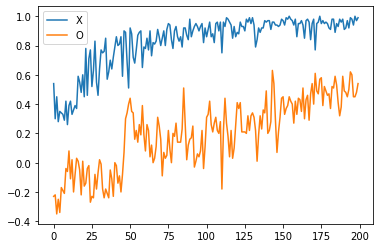

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

Нолики что-то не соглись, а вот с Иксами все выглядит норм. Надо попробовать потюнить гиперпараметры или больше итераций дать

## 4x4

In [ ]:
env4 = TicTacToe(4, 4, 4)

In [ ]:
STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn4 = GameManagerDQN(env4, 4, 512)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn4.run_episode()
for i in range(330):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn4.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn4.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn4.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cuda
0.24 0.1
0.23 0.08
0.17 0.03
0.1 0.08
0.08 0.03
0.19 0.15
0.15 0.07
0.01 -0.04
0.12 0.1
0.24 0.08
0.08 0.1
0.2 0.09
0.28 0.06
0.36 0.09
0.2 0.25
0.07 0.22
0.18 0.15
0.31 -0.0
0.42 0.1
0.21 0.15
0.39 0.15
0.38 0.01
0.26 -0.11
0.38 0.02
0.48 -0.01
0.4 0.13
0.3 0.33
0.47 0.2
0.56 0.37
0.49 0.28
0.66 0.22
0.79 0.32
0.43 0.52
0.7 0.22
0.46 0.21
0.56 0.3
0.6 0.42
0.61 0.13
0.56 0.39
0.62 0.32
0.56 0.21
0.59 0.44
0.74 0.45
0.61 0.32
0.66 0.29
0.65 0.27
0.73 0.38
0.75 0.23
0.6 0.45
0.69 0.29
0.7 0.45
0.51 0.43
0.69 0.47
0.89 0.36
0.77 0.2
0.73 0.23
0.74 0.43
0.63 0.3
0.7 0.45
0.62 0.54
0.62 0.42
0.77 0.46
0.79 0.4
0.79 0.51
0.65 0.56
0.63 0.47
0.8 0.43
0.68 0.45
0.68 0.39
0.77 0.47
0.84 0.45
0.72 0.57
0.66 0.42
0.8 0.55
0.76 0.43
0.56 0.5
0.67 0.42
0.77 0.55
0.61 0.45
0.75 0.57
0.74 0.49
0.78 0.57
0.71 0.51
0.65 0.64
0.73 0.56
0.81 0.62
0.82 0.59
0.78 0.58
0.73 0.62
0.8 0.62
0.71 0.58
0.72 0.5
0.73 0.55
0.82 0.48
0.77 0.6
0.85 0.61
0.78 0.58
0.86 0.52
0.8 0.55
0.91 0.66
0.84 0.65


In [ ]:
with open("../../dqn_model4.pth", "wb") as fp:
    torch.save(game_manager_dqn4.dqn.model.state_dict(), fp)

In [ ]:
with open("../../dqn_model4.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
# game_manager_dqn.dqn.model.load_state_dict(state_dict)

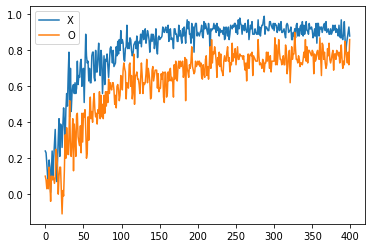

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

Прям хорошо получилось, неожиданно после неудачи на Q обучении для 4х4

## DuelingDQN 3x3

In [ ]:
env3 = TicTacToe(3, 3, 3)

STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn3_duel = GameManagerDQN(env3, 3, 256, 256, DuelingDQN)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn3_duel.run_episode()
for i in range(150):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn3_duel.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn3_duel.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn3_duel.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn3_duel.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn3_duel.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cuda
0.06 -0.5
-0.29 -0.4
-0.05 -0.52
0.07 -0.24
0.17 -0.32
0.06 -0.26
0.2 -0.09
0.06 -0.07
0.31 0.17
0.51 -0.17
0.63 0.08
0.61 0.01
0.33 0.18
0.35 -0.1
0.59 -0.03
0.45 -0.13
0.58 -0.17
0.52 -0.02
0.55 0.05
0.8 0.05
0.7 -0.16
0.6 0.05
0.74 -0.12
0.73 -0.21
0.85 -0.13
0.72 -0.05
0.65 -0.02
0.72 -0.08
0.69 -0.09
0.77 -0.02
0.82 -0.09
0.72 -0.09
0.79 -0.05
0.83 0.01
0.73 0.03
0.72 0.14
0.71 0.12
0.84 0.02
0.7 -0.03
0.81 -0.07
0.83 -0.03
0.92 -0.03
0.88 -0.02
0.89 -0.06
0.88 0.05
0.91 -0.03
0.92 0.14
0.86 -0.04
0.9 -0.05
0.86 0.15
0.86 0.16
0.91 0.09
0.86 0.07
0.86 0.29
0.85 0.27
0.94 0.28
0.93 0.25
0.95 0.14
0.88 0.24
0.88 0.11
0.89 0.23
0.9 0.2
0.91 0.09
0.91 0.35
0.92 0.17
0.87 0.14
0.93 0.03
0.94 0.22
0.86 0.12
0.92 0.12
0.92 0.2
0.96 0.27
0.93 0.15
0.93 0.04
0.91 0.24
0.89 0.15
0.96 0.27
0.89 0.23
0.95 0.24
0.96 0.08
0.93 0.15
0.96 0.28
0.92 0.27
0.95 0.24
0.91 0.35
0.95 0.34
0.91 0.43
0.94 0.43
0.96 0.35
0.88 0.36
0.96 0.4
0.92 0.41
0.93 0.39
0.95 0.4
0.95 0.38
0.91 0.35
0.92

In [ ]:
with open("../../dqn_model3_duel.pth", "wb") as fp:
    torch.save(game_manager_dqn3_duel.dqn.model.state_dict(), fp)

In [ ]:
with open("../../dqn_model3_duel.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
# game_manager_dqn.dqn.model.load_state_dict(state_dict)

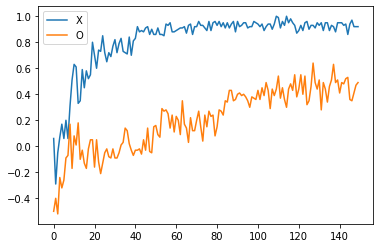

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

Нолики обучились хуже чем, без Dueling. Можно попробовать другие гиперпараметры. И еще можно обратить внимание на то, что графики стали стабильнее

## Dueling 4x4

In [ ]:
env3 = TicTacToe(4, 4, 4)

STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn3_duel = GameManagerDQN(env3, 4, 512, 256, DuelingDQN)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn3_duel.run_episode()
for i in range(400):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn3_duel.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn3_duel.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn3_duel.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn3_duel.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn3_duel.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cuda
-0.12 -0.2
0.12 -0.22
0.16 -0.11
0.1 -0.03
0.11 -0.09
0.21 0.16
0.09 -0.03
0.31 0.06
0.35 0.09
0.23 -0.01
0.17 0.17
0.3 0.3
0.3 0.22
0.19 0.12
0.31 0.02
0.33 0.21
0.34 0.25
0.25 0.09
0.33 0.23
0.38 0.25
0.3 0.18
0.46 0.21
0.38 0.22
0.4 0.08
0.37 0.15
0.52 0.15
0.35 0.37
0.26 0.11
0.39 0.18
0.4 0.27
0.46 0.35
0.45 0.36
0.51 0.31
0.34 0.39
0.33 0.25
0.57 0.16
0.47 0.19
0.4 0.16
0.46 0.23
0.53 0.39
0.49 0.24
0.52 0.24
0.52 0.26
0.62 0.3
0.78 0.2
0.51 0.31
0.69 0.36
0.58 0.25
0.62 0.27
0.7 0.34
0.79 0.11
0.84 0.18
0.7 0.28
0.73 0.32
0.84 0.27
0.75 0.43
0.77 0.37
0.66 0.36
0.74 0.36
0.7 0.4
0.85 0.27
0.78 0.18
0.86 0.38
0.82 0.34
0.87 0.24
0.9 0.37
0.83 0.34
0.85 0.5
0.81 0.26
0.75 0.32
0.88 0.49
0.82 0.45
0.85 0.39
0.84 0.4
0.84 0.4
0.8 0.27
0.78 0.46
0.88 0.32
0.95 0.25
0.84 0.36
0.91 0.58
0.87 0.39
0.87 0.42
0.92 0.43
0.83 0.54
0.95 0.49
0.8 0.3
0.87 0.4
0.86 0.45
0.85 0.42
0.81 0.3
0.84 0.38
0.94 0.41
0.9 0.35
0.83 0.51
0.86 0.47
0.79 0.51
0.86 0.49
0.93 0.61
0.96 0.47
0.91

KeyboardInterrupt: ignored

In [ ]:
with open("../../dqn_model4_duel.pth", "wb") as fp:
    torch.save(game_manager_dqn3_duel.dqn.model.state_dict(), fp)

In [ ]:
with open("../../dqn_model4_duel.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
# game_manager_dqn.dqn.model.load_state_dict(state_dict)

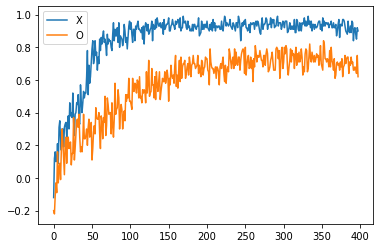

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

Здесь особо нечего сказать, модель хорошо обучилась и для Х и для О

# Пункт 3

## Роллауты

In [ ]:
class Rollouts:
    
    def __init__(self, env, player=RandomPlayer(), num_rolouts=10, rollout_with_random=True) -> None:
        self.env = env
        self.player = player
        self.n_rollouts = 10
        self.player_random = RandomPlayer()
        self.rollout_with_random = rollout_with_random
        
    def rollout(self, cur_env, rollout_id) -> float:
        env = deepcopy(cur_env)
        state, empty_spaces, turn = env.getState()
        reward_coef = -turn
        done = False
        player_id = 0 if reward_coef == 1 else 1
        while not done:
            if self.rollout_with_random:
                if player_id == rollout_id:
                    action = self.player.get_greedy_action(state)
                else:
                    action = self.player_random.get_greedy_action(state)
            else:
                action = self.player.get_greedy_action(state)
            action_tuple = env.action_from_int(action)
            (state, empty_spaces, turn), reward, done, _ = env.step(action_tuple)
            player_id = 1 if player_id == 0 else 0
        return reward * reward_coef
    
    def get_action_from_rollouts(self, rollout_id, n_iters=1) -> int:
        env_current = deepcopy(self.env)
        state, empty_spaces, turn = env_current.getState()
        reward_coef = turn
        empty_actions = get_empty_actions(state)
        rollout_results = {}
        for action in empty_actions:
            env_current = deepcopy(env)
            action_tuple = env.action_from_int(action)
            (state, empty_spaces, turn), reward, done, _ = env_current.step(action_tuple)
            if not done:
                rollout_results[action] = np.mean([self.rollout(env_current, rollout_id) for _ in range(n_iters)])
            else:
                rollout_results[action] = reward * reward_coef

        best_action = max(rollout_results, key=rollout_results.get)
        return best_action
    
    def run_episode(self, rollout_id):
        self.env.reset()
        state, empty_spaces, turn = self.env.getState()
        done = False
        player_id = 0

        while not done:
            if player_id == rollout_id:
                action = self.get_action_from_rollouts(rollout_id, n_iters=self.n_rollouts)
            else:
                action = self.player_random.get_greedy_action(state)

            (state, empty_spaces, turn), reward, done, _ = self.env.step(self.env.action_from_int(action))
            player_id = 1 if player_id == 0 else 0

        return reward

### 3x3

Экспеперимент где оба игрока при расчете ролаутов случайные

In [ ]:
env = TicTacToe(3, 3, 3)
rollouts_game = Rollouts(env)
hist_0 = []
hist_1 = []
for _ in range(1000):
    hist_0.append(rollouts_game.run_episode(0))
    hist_1.append(-1 * rollouts_game.run_episode(1))

In [ ]:
(pd.Series(hist_0).value_counts(), pd.Series(hist_1).value_counts())

( 1    970
 -1     15
  0     15
 dtype: int64,  1    821
  0    100
 -1     79
 dtype: int64)

Экспеперимент где роллауты высчитывается со следующими игроками: Иксы - игрок со стратегией из Q обучение 3х3, а Нолики слулчайный игрок

In [ ]:
with open('q_dict.pkl', 'rb') as f:
    Q = pickle.load(f)
    default_dict_Q = defaultdict(lambda: np.random.rand(9))
    default_dict_Q.update(Q)
player_Q = Player(0, 0, default_dict_Q, 0)

In [ ]:
rollouts_game = Rollouts(env, player_Q, 10, True)
hist_0 = []
hist_1 = []
for _ in range(1000):
    hist_0.append(rollouts_game.run_episode(0))
    hist_1.append(-1 * rollouts_game.run_episode(1))
pd.Series(hist_0).value_counts(), pd.Series(hist_1).value_counts()

( 1    959
  0     36
 -1      5
 dtype: int64,  1    675
  0    218
 -1    107
 dtype: int64)

Экспеперимент где оба игрока при расчете ролаутов это жадные стратегии из пункта 1. Так как стратегии жадные - мы применяем только 1 итерацию ролаута

In [ ]:
rollouts_game = Rollouts(env, player_Q, 1, False)
hist_0 = []
hist_1 = []
for _ in range(1000):
    hist_0.append(rollouts_game.run_episode(0))
    hist_1.append(-1 * rollouts_game.run_episode(1))
pd.Series(hist_0).value_counts(), pd.Series(hist_1).value_counts()

(1    995
 0      5
 dtype: int64,  1    827
  0    153
 -1     20
 dtype: int64)

Видимо из-за того что модель в первом пункте rollout'ы по стратегии из пункта 1 оказались лучше. Но возможно в предыдущих случаях просто нужно было сделать больше итераций. Замечание: если модель слабая, то нужно делать побольше ролаутов с рандомными шагами, чтобы получить лучшие результаты.

### 4x4

In [ ]:
env = TicTacToe(4, 4, 4)
rollouts_game = Rollouts(env, num_rolouts=25)
hist_0 = []
hist_1 = []
for _ in range(1000):
    hist_0.append(rollouts_game.run_episode(0))
    hist_1.append(-1 * rollouts_game.run_episode(1))

(pd.Series(hist_0).value_counts(), pd.Series(hist_1).value_counts())

( 1    920
  0     71
 -1      9
 dtype: int64,
  1    855
  0    134
 -1     11
 dtype: int64)

Для 4х4 достаточно долго, но все равно достаточно успешно

## MCTS

In [ ]:
class MonteCarloTreeSearchNode:
    def __init__(self, state, action, player_id, parent=None, is_new=True):
        self.state = state
        self.action = action
        self.parent = parent
        self.player_id = player_id
        self.node_vals = [0, 0]
        self.visits = 0
        self.children = []
        self.is_new = is_new
        self.is_terminal = False
        
    def value(self):
        if self.visits == 0:
            return 0
        
        val = self.node_vals[self.player_id] / self.visits
        return val

In [ ]:
class MCTS:
    def __init__(self, env, exploration_const, player_id, player):
        self.env = env
        self.size = self.env.n_rows
        self.C = exploration_const
        self.random_player = RandomPlayer()
        self.player = player
        self.policy = self.player.get_greedy_action
        self.policy_random = self.random_player.get_greedy_action
        self.player_id = player_id
        self.env.reset()
        state, empty_spaces, turn = self.env.getState()
        self.root = MonteCarloTreeSearchNode(state=state, action=None, player_id=player_id, parent=None, is_new=False)
        self.hist = []
        self.hist_iters = []
        
         
    @staticmethod
    def get_new_state(s, action, player_id):
        action_str = "2" if player_id == 0 else "0"
        new_hash = s[:action] + action_str + s[action + 1:]
        return new_hash
    
    
    def evalueate_tree(self, num_games=1000):
        rewards = []
        for _ in range(num_games):
            node = self.root
            self.env.reset()
            state, empty_spaces, turn = self.env.getState()
            done = False
            player_id = 0
            while not done:
                if node.children:
                    if player_id != self.player_id:
                        child = random.choice(node.children)
                    else:
                        child = max(node.children, key=lambda x: x.value())
                    node = child
                    action = child.action
                else:
                    action = self.random_policy(state)
                    
                (state, empty_spaces, turn), reward, done, _ = self.env.step(self.env.action_from_int(action))
                player_id = 1 if player_id == 0 else 0
            rewards.append(reward)
        return rewards.count(1) / num_games, rewards.count(-1) / num_games, rewards.count(0) / num_games
    
    @staticmethod
    def backprop(node, vals):
        while node is not None:
            node.node_vals[0] += vals[0]
            node.node_vals[1] += vals[1]
            node.visits += 1
            node = node.parent
            
    def get_child_ucb(self, node):
        ucbs = []
        for child in node.children:
            ucb = child.value() + self.C * np.sqrt(np.log(node.visits) / child.visits)
            ucbs.append(ucb)
        ucb_idx = np.argmax(ucbs)
        best_child = node.children[ucb_idx]
        return best_child
    
    def play_game_from_state(self, state, player_id):
        self.env.reset()
        board = np.array([int(c) - 1 for c in state]).reshape(self.size, self.size)
        self.env.board = board
        player_id = player_id
        is_terminal = False
        done = False
        
        if self.env.isTerminal() is not None:
            reward = self.env.isTerminal()
            done = True
            is_terminal = True        
        
        while not done:
            if player_id == self.player_id:
                action = self.policy(state)
            else:
                action = self.policy_random(state)
            (state, empty_spaces, turn), reward, done, _ = self.env.step(self.env.action_from_int(action))
            player_id = 0 if player_id == 1 else 1
            
        
        return reward, is_terminal
            
            
    def rollout(self, node):
        if node.is_terminal:
            vals = [int(node.node_vals[0] > 0), int(node.node_vals[1] > 0)]
            return vals, node.is_terminal
        vals = [0, 0]
        state = node.state
        reward, is_terminal = self.play_game_from_state(state, node.player_id)
        if reward == 1:
            vals[0] = 1
        elif reward == -1:
            vals[1] = 1
        
        return vals, is_terminal
            
    def learning_step(self):
        node = self.root
        while True:
            if node.is_terminal:
                vals, is_terminal = self.rollout(node)
                node.node_vals[0] += vals[0]
                node.node_vals[1] += vals[1]
                node.is_terminal = is_terminal
                node.is_new = False
                self.backprop(node, vals)
                break
                
            empty_actions = set(get_empty_actions(node.state))
            child_actions = {child.action for child in node.children}
            left_actions = empty_actions - child_actions
            if left_actions:
                action = random.choice(list(left_actions))
                new_player_id = 0 if node.player_id == 1 else 1
                new_state = self.get_new_state(node.state, action, new_player_id)
                
                child = MonteCarloTreeSearchNode(
                    state=new_state,
                    action=action,
                    player_id=new_player_id,
                    parent=node,
                )
                node.children.append(child)
                vals, is_terminal = self.rollout(child)
                child.node_vals[0] += vals[0]
                child.node_vals[1] += vals[1]
                child.is_terminal = is_terminal
                child.is_new = False
                self.backprop(child, vals)
                
            else:
                if node.player_id != self.player_id:
                    child = self.get_child_ucb(node)
                else:
                    child = random.choice(node.children)
            node = child

    def run_learning(self, n_iters=1000, eval_every=50):
        for i in range(n_iters):
            self.learning_step()
            if i % eval_every == 0:
                self.eval_history(i, eval_every)

    def eval_history(self, num_iter, eval_every):
        res_p0, res_p1, res_nichya = self.evalueate_tree(num_games=100)
        if self.player_id == 0:
            self.hist.append(res_p0)
        else:
            self.hist.append(res_p1)
            
        self.hist_iters.append(self.hist_iters[-1] + eval_every)
        

In [ ]:
with open('q_dict.pkl', 'rb') as f:
    Q = pickle.load(f)
    default_dict_Q = defaultdict(lambda: np.random.rand(9))
    default_dict_Q.update(Q)

In [ ]:
from math import sqrt
env = TicTacToe(n_rows=3, n_cols=3, n_win=3)
env.reset()
game_hash, empty_spaces, _ = env.getState()
player_Q = Player(0, 0, default_dict_Q, 0)

### MCTS 3x3

Модель для крестиков

In [ ]:
mcts_p1 = MCTS(env, sqrt(2), 0, player_Q)
mcts_p1.run_learning(n_iters=30000, eval_every=200)

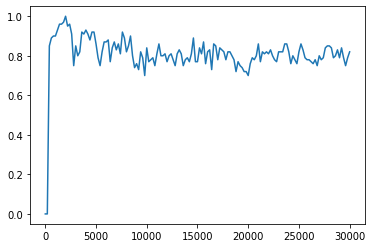

In [ ]:
plt.plot(mcts_p1.hist_iters, mcts_p1.hist)

Модель для ноликов

In [ ]:
mcts_p1 = MCTS(env, sqrt(2), 1, player_Q)
mcts_p1.run_learning(n_iters=30000, eval_every=200)

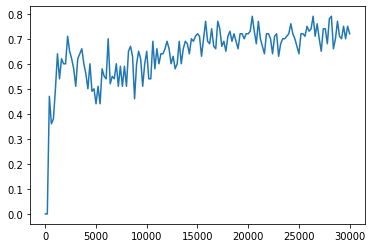

In [ ]:
plt.plot(mcts_p1.hist_iters, mcts_p1.hist)

MCTS для 3х3 получилось хорошо

# Выводы

П1.Табличный Q-learning самый простой, но не удалось обучить нормально даже для доски 4х4.<br>
П2. Нейронные сети круто, особенно порадовало что хорошо для 4х4 получилось. С использованием Dueling DQN на снизился шум результатов, но в целом большого эффекта не дало <br>
П3. Rollout'ы хорошо зашли. MCTS круто и достаточно быстро для маленьких задач, похоже что именно 
этот подход лучше всего подходит для крестиков и ноликов небольшое размерности.

# end